# Showcase of the final model

For the Colab version of showcase next cell clone repo, install libraries, that are not presented in Colab and assemble the model.pt file with model weights.

In [10]:
from IPython.display import clear_output

# clone repo with code
!git clone https://github.com/DainfromLiria/Sand_grains_classification.git
# install libraries that are not in Colab
!pip install neptune
!pip install git+https://github.com/nasa/pretrained-microscopy-models
!pip install python-dotenv
clear_output(wait=True)
# merge model chunks into one model.pt file
%cd Sand_grains_classification
%cd scripts
!python3 merge_split_pt.py merge && echo "model.pt was successfully created"
%cd ..

/content/Sand_grains_classification/Sand_grains_classification
/content/Sand_grains_classification/Sand_grains_classification/scripts
Merged chunks into '/content/Sand_grains_classification/Sand_grains_classification/results/03adda57-e689-4a1b-b1aa-84692602e12f/model.pt'
model.pt was successfully created
/content/Sand_grains_classification/Sand_grains_classification


Add `src` forder into Python Path

In [11]:
import sys
sys.path.append('/content/Sand_grains_classification/src')

Import modules for model run

In [12]:
from src.detector import MicroTextureDetector
from src.setup import setup
from src.utils import visualize_prediction

Setup logging and default folder for pytorch model weights. Inicialize `MicroTextureDetector` in inference mode and load model weights. This step must be run only once. For new images rerun only last two code cells.

In [13]:
setup()
det = MicroTextureDetector(mode="infer", experiment_uuid="03adda57-e689-4a1b-b1aa-84692602e12f")

Put your image into `input_images` folder and specify image name in `img_name` attribute. Some example images are already in `input_images` folder. If you want to make a prediction on another image, just change `img_name` and rerun the cell.

In [14]:
img, pred = det.predict(img_name="KP1_40.tif") # KHA6_05.tif, KP1_32.tif, KP1_40.tif PI2_26.tif, KP2_5.tif KP3_12.tif

The next cell provides a visualization of the detected microtextures. Each image shows one microtexture, whose name is printed at the top of the image.

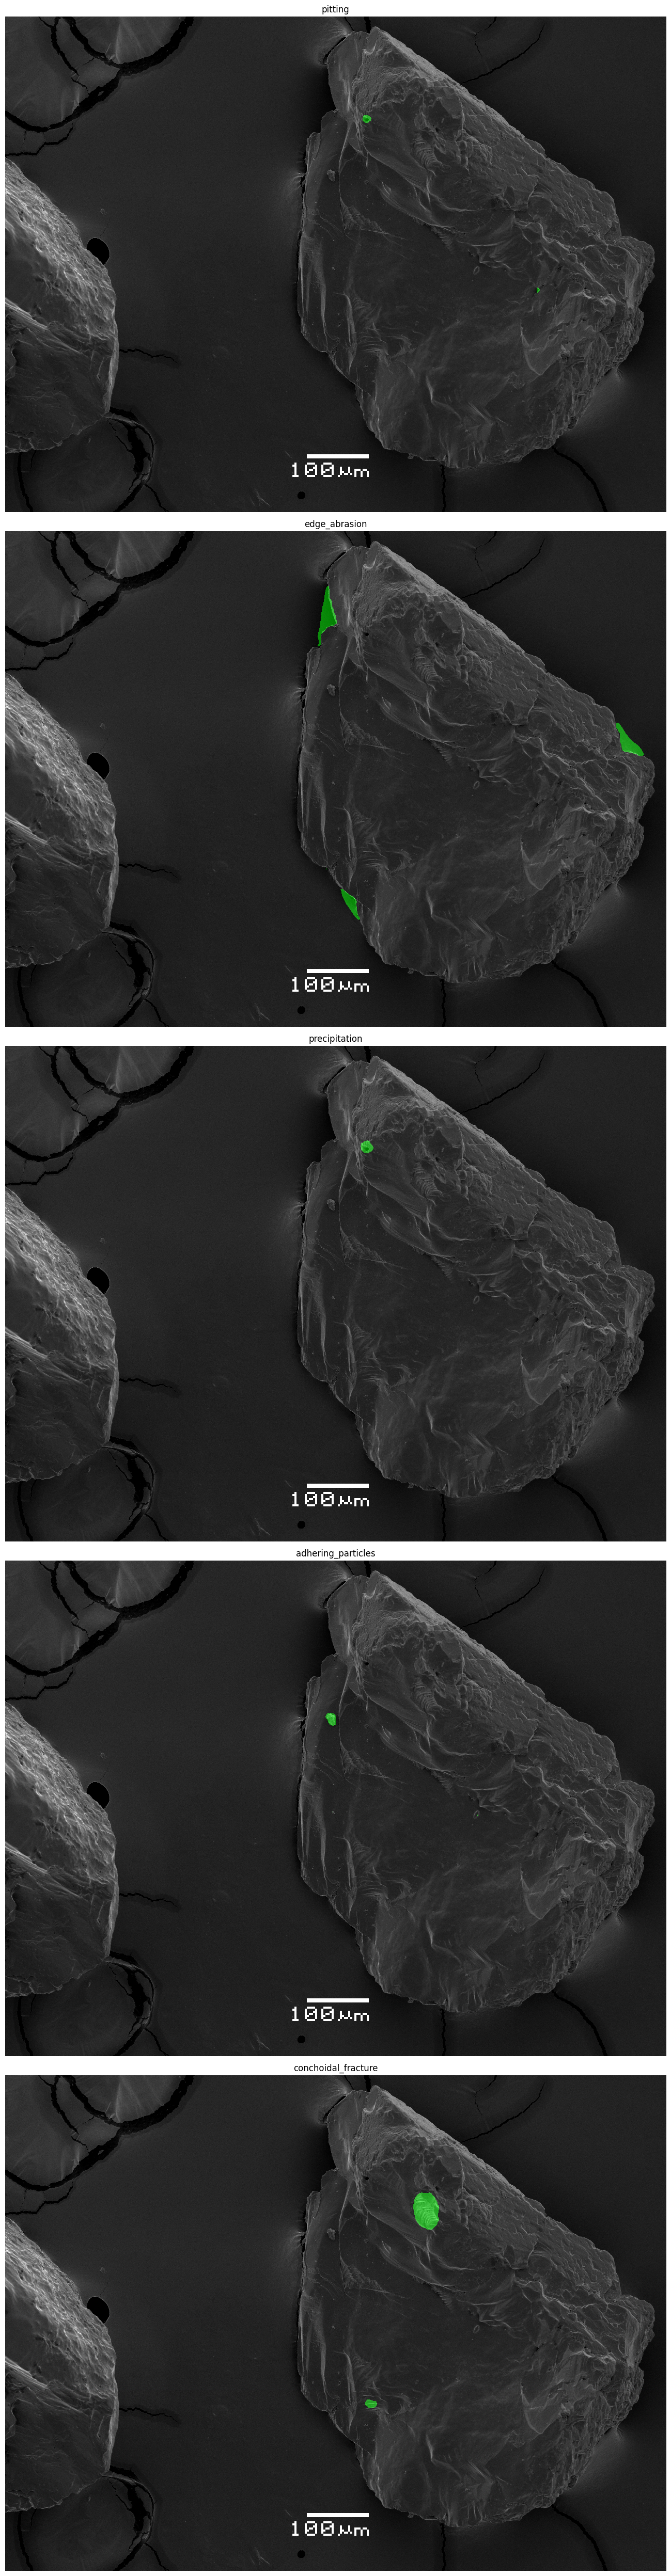

In [15]:
visualize_prediction(img, pred)